In [282]:
import random
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

In [ ]:
def collision(state): # Function to simulate a collision between two particles
    # state = (A, B, C) where A, B, C are the number of particles of each type
    
    a, b, c = state
    options = []
    
    if a > 0 and b > 0: 
        options.append((a - 1, b - 1, c + 2)) #A + B -> 2C
    if a > 0 and c > 0: 
        options.append((a - 1, b + 2, c - 1)) #A + C -> 2B
    if b > 0 and c > 0: 
        options.append((a + 2, b - 1, c - 1)) #B + C -> 2A 
    if not options: 
        return state 
    
    return random.choice(options)

In [ ]:
def absorption(state): # Function to check if the system is in an absorbing state
    # An absorbing state is when all particles are of one type
    a, b, c = state
    
    return (a > 0 and b == c == 0) or (b > 0 and a == c == 0) or (c > 0 and a == b == 0) # True if absorbing state, False otherwise

In [ ]:
def simulate(state, max_steps=1000): # Function to simulate the system for a given number of steps
    for t in range(max_steps): 
        if absorption(state): 
            return state, t # If in absorbing state, return the state and time
        state = collision(state) 
    return state, max_steps # If max steps reached, return the state and max_steps

In [ ]:
def final_state(state): # Function to determine the final state of the system
    a, b, c = state
    if a > 0 and b == c == 0: return 'A' # A is the only type left
    if b > 0 and a == c == 0: return 'B' # B is the only type left
    if c > 0 and a == b == 0: return 'C' # C is the only type left
    return 'Loop' # If all types are present, return 'Loop'

In [ ]:
def simulate_runs(start, trials=1000, max_steps=1000): # Function to run multiple simulations and collect results
    outcomes = []
    steps = []
    for _ in range(trials): 
        result, step_count = simulate(start, max_steps) 
        outcomes.append(final_state(result)) 
        steps.append(step_count) 
    return outcomes, steps

In [ ]:
def summary(outcomes, steps): # Function to summarize the results of the simulations
    # outcomes = list of final states from the simulations
    total = len(outcomes) 
    frequency = Counter(outcomes) # Count occurrences of each outcome
    
    print("Summary of outcomes:") # Print the summary of outcomes
    for outcome, count in frequency.items(): # Count occurrences of each outcome
        print(f"{outcome}: {count / total:.2%} ({count})") # Print the percentage and count of each outcome
        
    print("\nAverage steps to absorption:") # Print the average steps to absorption
    avg_steps = sum(steps) / len(steps) # Calculate the average steps
    print(f"{avg_steps:.2f} steps") # Print the average steps
    

In [ ]:
def plot_outcomes(outcomes): # Function to plot the outcomes of the simulations
    counts = Counter(outcomes) # Count occurrences of each outcome
    labels = ['A', 'B', 'C', 'Loop'] # Define the labels for the outcomes
    values = [counts.get(label, 0) for label in labels] # Get the counts for each label
    
    # Create a bar plot for the final states
    plt.figure(figsize=(8, 5))
    plt.bar(labels, values, color=['blue', 'orange', 'green', 'red'], edgecolor='black')
    plt.title('Final State Distribution')
    plt.xlabel('Final State')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

In [ ]:
def plot_steps(steps): # Function to plot the distribution of steps to absorption
    
    # Create a histogram for the steps to absorption
    plt.figure(figsize=(6, 4))
    plt.hist(steps, bins=15, color='mediumseagreen', edgecolor='black')
    plt.title('Steps to Absorption')
    plt.xlabel('Number of Steps')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


Summary of outcomes:
A: 100.00% (1000)

Average steps to absorption:
7.09 steps


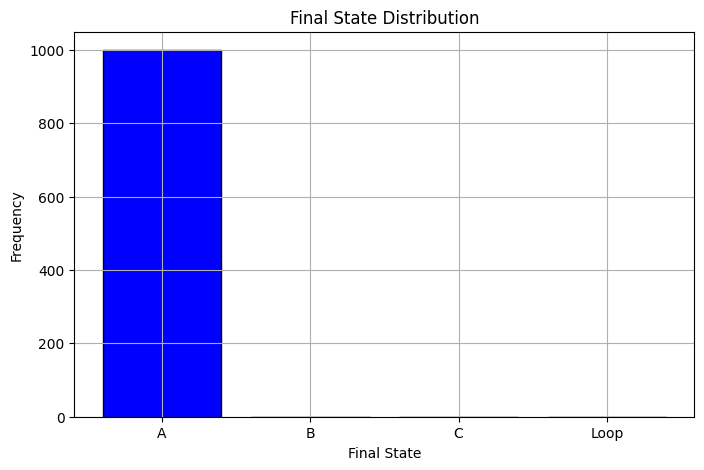

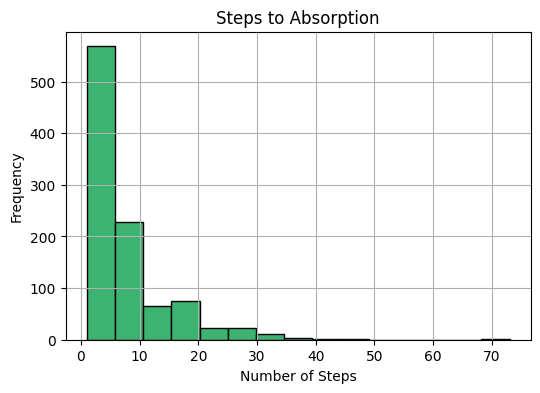

In [ ]:
outcomes, steps = simulate_runs((2, 1, 1), trials=1000) # Simulate the system with 2 A, 1 B, and 1 C particles for 1000 trials
summary(outcomes, steps)
plot_outcomes(outcomes)
plot_steps(steps)

Summary of outcomes:
Loop: 100.00% (1000)

Average steps to absorption:
1000.00 steps


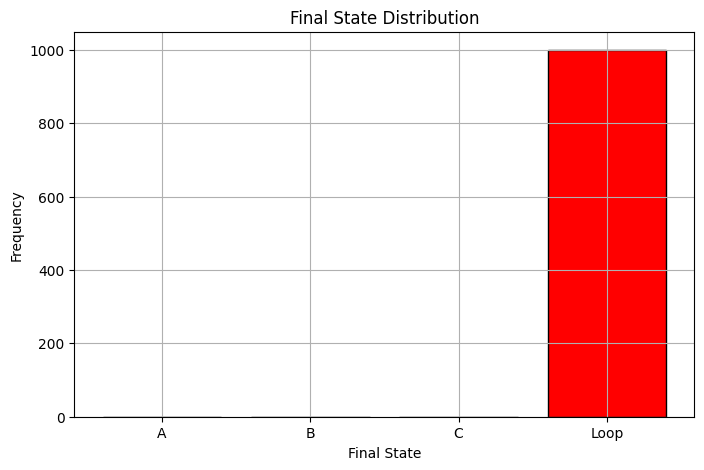

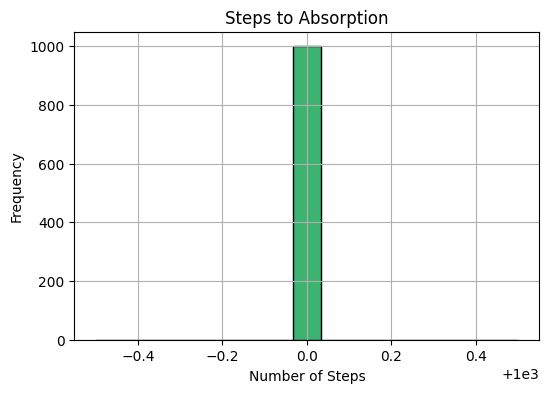

In [ ]:
outcomes, steps = simulate_runs((3, 2, 1), trials=1000) # Simulate the system with 3 A, 2 B, and 1 C particles for 1000 trials
summary(outcomes, steps)
plot_outcomes(outcomes)
plot_steps(steps)

Summary of outcomes:
C: 34.60% (346)
A: 34.90% (349)
B: 30.50% (305)

Average steps to absorption:
7.68 steps


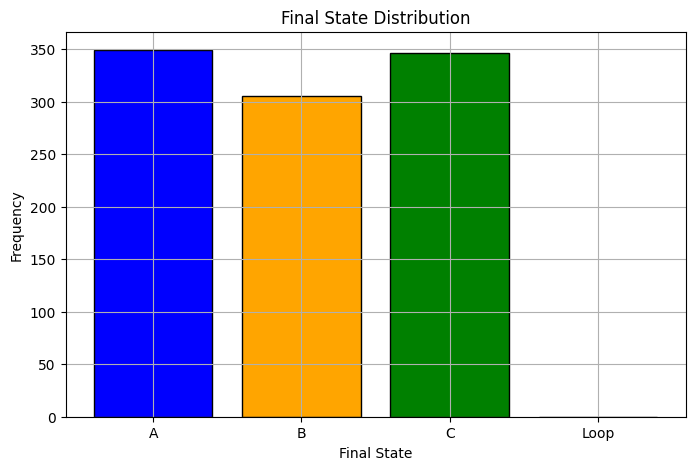

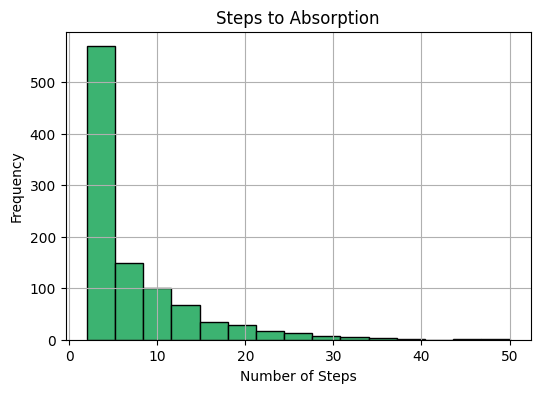

In [ ]:
outcomes, steps = simulate_runs((2, 2, 2), trials=1000) # Simulate the system with 2 A, 2 B, and 2 C particles for 1000 trials
summary(outcomes, steps)
plot_outcomes(outcomes)
plot_steps(steps)

In [ ]:
def collect_summary(states, trials=200): # Function to collect summary statistics for multiple initial states
    # states = list of initial states to simulate
    rows = []

    # Iterate through each initial state and simulate
    for start in states:
        outcomes, steps = simulate_runs(start, trials=trials)
        freq = Counter(outcomes)
        total = len(outcomes)

        # Calculate the frequency of each outcome
        row = {
            'Start': start,
            'A %': 100 * freq['A'] / total,
            'B %': 100 * freq['B'] / total,
            'C %': 100 * freq['C'] / total,
            'Loop %': 100 * freq['Loop'] / total,
            'Avg Steps': sum(steps) / total
        }

        rows.append(row)

    return pd.DataFrame(rows) # Create a DataFrame to store the summary statistics

In [ ]:
test_states = [ # Define a list of test states to simulate
    (1, 1, 1), (2, 2, 2), (3, 3, 3), (4, 4, 4), (5, 5, 5),
]
df = collect_summary(test_states, trials=1000)
df

,Start,A %,B %,C %,Loop %,Avg Steps
0,"(1, 1, 1)",33.0,32.4,34.6,0.0,1.000
1,"(2, 2, 2)",34.6,32.7,32.7,0.0,7.907
2,"(3, 3, 3)",34.9,32.2,32.9,0.0,26.598
3,"(4, 4, 4)",33.2,34.8,32.0,0.0,61.132
4,"(5, 5, 5)",32.0,35.5,32.5,0.0,102.566


In [ ]:
def dataframe_to_image(df, filename='table.png', dpi=300): # Function to save a DataFrame as an image
    fig, ax = plt.subplots(figsize=(len(df.columns) * 1.2, len(df) * 0.5 + 1))
    ax.axis('off')
    table = ax.table(cellText=df.round(3).values,
                        colLabels=df.columns,
                        rowLabels=None,
                        loc='center',
                        cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)

    plt.tight_layout()
    plt.savefig(filename, dpi=dpi, bbox_inches='tight', transparent=True)
    plt.close()
    
dataframe_to_image(df, 'symmetric_states_table.png') 

In [ ]:
test_states = [ # MMore test states to simulate
    (1, 1, 1), (2, 2, 2), (3, 3, 3), (4, 4, 4), (5, 5, 5),  # Group A
    (2, 1, 1), (1, 2, 1), (1, 1, 2), (3, 2, 2), (2, 3, 2), (2, 2, 3),  # B
    (3, 3, 0), (0, 3, 3), (3, 0, 3), (5, 1, 0), (0, 5, 1), (1, 0, 5),  # C
    (5, 1, 1), (6, 2, 1), (6, 1, 2), (10, 2, 2), (20, 1, 1),  # D
    (2, 1, 1), (3, 2, 1), (4, 2, 2), (5, 3, 2)  # E
]
df = collect_summary(test_states, trials=1000)
df

,Start,A %,B %,C %,Loop %,Avg Steps
0,"(1, 1, 1)",35.8,33.4,30.8,0.0,1.000
1,"(2, 2, 2)",33.2,32.9,33.9,0.0,8.180
2,"(3, 3, 3)",33.1,31.4,35.5,0.0,27.897
3,"(4, 4, 4)",35.7,30.0,34.3,0.0,56.911
4,"(5, 5, 5)",31.0,33.4,35.6,0.0,99.785
5,"(2, 1, 1)",100.0,0.0,0.0,0.0,7.087
6,"(1, 2, 1)",0.0,100.0,0.0,0.0,7.207
7,"(1, 1, 2)",0.0,0.0,100.0,0.0,7.066
8,"(3, 2, 2)",100.0,0.0,0.0,0.0,48.398
9,"(2, 3, 2)",0.0,100.0,0.0,0.0,50.588


In [ ]:
def collision_ab_to_c(state): # Function to simulate a collision between two particles with a decay rule
    a, b, c = state
    transitions = []

    if a > 0 and b > 0:
        transitions.append((a - 1, b - 1, c + 1))  # A + B → C 
    if a > 0 and c > 0:
        transitions.append((a - 1, b + 1, c - 1))  # A + C → B
    if b > 0 and c > 0:
        transitions.append((a + 1, b - 1, c - 1))  # B + C → A

    if not transitions:
        return state, False
    return random.choice(transitions), True 

In [ ]:
def simulate_ab_to_c(start_state, max_steps=1000): # Function to simulate the system with a decay rule 1000 times
    state = start_state
    for step in range(max_steps):
        state, changed = collision_ab_to_c(state)
        if not changed:
            return step, state
    return max_steps, state

In [305]:
test_states = [
    (2, 1, 1),  # Smallest non-trivial case
    (3, 2, 1),  # Loops in original model
    (3, 3, 3),  # Symmetric case
    (4, 2, 2),  # Majority A, loops in original model
    (2, 2, 2)   # Equal case used in summary table
]    

In [ ]:
def collect_decay_summary(states, trials=1000): # Function to collect summary statistics for multiple initial states with decay rule
    rows = []
    for state in states:
        final_counts = Counter()
        steps = []
        
        for _ in range(trials):
            step_count, final = simulate_ab_to_c(state)
            dominant = ['A', 'B', 'C'][final.index(max(final))]
            steps.append(step_count)
            final_counts[dominant] += 1

        row = {
            'Start': state,
            '# A %': round(final_counts['A'] / trials * 100, 1), 
            '# B %': round(final_counts['B'] / trials * 100, 1),
            '# C %': round(final_counts['C'] / trials * 100, 1),
            '# Avg Steps': round(sum(steps) / len(steps), 2)
        }
        rows.append(row)

    return pd.DataFrame(rows)

In [ ]:
decay_df = collect_decay_summary(test_states, trials=1000) # Collect summary statistics for decay rule
decay_df

,Start,# A %,# B %,# C %,# Avg Steps
0,"(2, 1, 1)",100.0,0.0,0.0,2.36
1,"(3, 2, 1)",0.0,100.0,0.0,4.72
2,"(3, 3, 3)",35.7,32.3,32.0,5.97
3,"(4, 2, 2)",47.2,26.0,26.8,4.93
4,"(2, 2, 2)",35.3,34.1,30.6,3.33


In [ ]:
dataframe_to_image(decay_df, 'decay_states_table.png') # Save the decay summary DataFrame as an image

In [ ]:
def collisions_4(state): # Function to simulate a collision between four particles with a transformation rule
    # state = (A, B, C, D) where A, B, C, D are the number of particles of each type
    a, b, c, d = state
    transitions = []

    if a > 0 and b > 0:
        transitions.append((a - 1, b - 1, c + 1, d + 1))  # A + B → C + D
    if a > 0 and c > 0:
        transitions.append((a - 1, b + 1, c - 1, d + 1))  # A + C → B + D
    if a > 0 and d > 0:
        transitions.append((a - 1, b + 1, c + 1, d - 1))  # A + D → B + C
    if b > 0 and c > 0:
        transitions.append((a + 1, b - 1, c - 1, d + 1))  # B + C → A + D
    if b > 0 and d > 0:
        transitions.append((a + 1, b - 1, c + 1, d - 1))  # B + D → A + C
    if c > 0 and d > 0:
        transitions.append((a + 1, b + 1, c - 1, d - 1))  # C + D → A + B

    if not transitions:
        return state, False
    return random.choice(transitions), True 

In [ ]:
def run_simulation_4(start_state, max_steps=1000): # Function to simulate the system with four particles for a given number of steps
    state = start_state
    for step in range(max_steps):
        state, changed = collisions_4(state)
        if not changed:
            return step
    return max_steps

In [ ]:
def plot_termination_histogram_4(start_state, trials=1000, max_steps=1000): # Function to plot the histogram of steps to termination for the 4-type collision rule
    steps_list = [run_simulation_4(start_state, max_steps) for _ in range(trials)]

    # Create a histogram for the steps to termination
    plt.figure(figsize=(8, 4))
    plt.hist(steps_list, bins=range(0, max(steps_list)+1), color='skyblue', edgecolor='black')
    plt.title(f"Steps to Termination for {start_state} under 4-Type Collision Rule")
    plt.xlabel("Steps to Termination")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    return steps_list

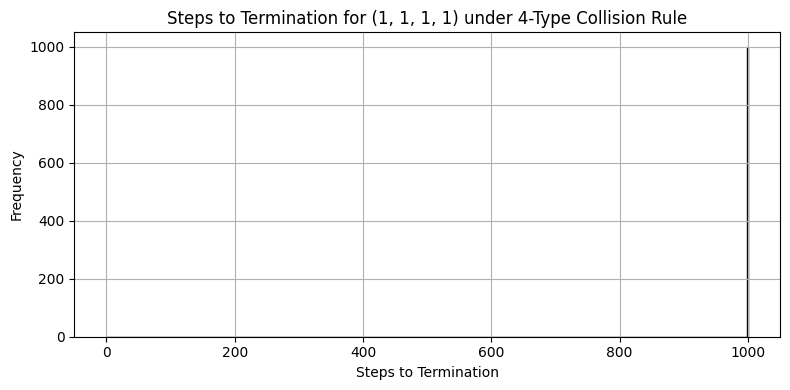

[1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,

In [314]:
plot_termination_histogram_4((1,1,1,1))

In [315]:
def simulate_and_record_4(start_state, max_steps=1000): # Function to simulate the system with 4 types of particles and record the final state
    state = start_state
    for _ in range(max_steps):
        state, changed = collisions_4(state)
        if not changed:
            return state, False  # terminated naturally
    return state, True  # hit max_steps, likely looping

In [ ]:
test_states_4 = [ # Define a list of test states to simulate with 4 types of particles
    (1, 1, 1, 1),
    (2, 2, 2, 2),
    (3, 3, 3, 3),
    (4, 4, 4, 4),
    (5, 5, 5, 5),
    (3, 1, 1, 1),
    (4, 1, 1, 1),
    (5, 1, 1, 1),
    (6, 1, 1, 1),
    (10, 1, 1, 1),
]

In [317]:
def collect_4type_summary(states, trials=500): # Function to collect summary statistics for multiple initial states with 4 types of particles
    # states = list of initial states to simulate
    rows = []
    for state in states: 
        loop_count = 0 
        term_count = 0 
        survivors = Counter() 
        
        # Simulate the system for a given number of trials
        # and record the final state
        for _ in range(trials):
            final, looped = simulate_and_record_4(state)
            if looped:
                loop_count += 1
            else:
                term_count += 1
                dominant = ['A', 'B', 'C', 'D'][final.index(max(final))]
                survivors[dominant] += 1
                
        # Calculate the total number of trials
        total = loop_count + term_count
        row = {
            'Start': state,
            '% Loop': round(loop_count / total * 100, 1),
            '% A': round(survivors['A'] / total * 100, 1),
            '% B': round(survivors['B'] / total * 100, 1),
            '% C': round(survivors['C'] / total * 100, 1),
            '% D': round(survivors['D'] / total * 100, 1),
        }
        rows.append(row)

    return pd.DataFrame(rows) # Create a DataFrame to store the summary statistics

In [318]:
df_4type_summary = collect_4type_summary(test_states_4)
df_4type_summary

,Start,% Loop,% A,% B,% C,% D
0,"(1, 1, 1, 1)",100.0,0.0,0.0,0.0,0.0
1,"(2, 2, 2, 2)",100.0,0.0,0.0,0.0,0.0
2,"(3, 3, 3, 3)",100.0,0.0,0.0,0.0,0.0
3,"(4, 4, 4, 4)",100.0,0.0,0.0,0.0,0.0
4,"(5, 5, 5, 5)",100.0,0.0,0.0,0.0,0.0
5,"(3, 1, 1, 1)",100.0,0.0,0.0,0.0,0.0
6,"(4, 1, 1, 1)",100.0,0.0,0.0,0.0,0.0
7,"(5, 1, 1, 1)",100.0,0.0,0.0,0.0,0.0
8,"(6, 1, 1, 1)",100.0,0.0,0.0,0.0,0.0
9,"(10, 1, 1, 1)",100.0,0.0,0.0,0.0,0.0


In [319]:
dataframe_to_image(df_4type_summary, 'four_type_summary.png') # Save the 4-type summary DataFrame as an image